In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fqs import *
import copy

In [7]:
m = 100
n = 50
k = 2
np.random.seed(0)
Us = np.random.randn(m,k)
VTs = np.random.randn(k,n)

A = Us @ VTs
np.random.seed(1)
OmegaOrig = []
for i in range(n):
    for j in range(m):
        if np.random.rand(1)<0.05:
            OmegaOrig.append([j,i])
np.random.shuffle(OmegaOrig)
len(OmegaOrig), m*n

(263, 5000)

In [8]:
np.random.seed(1)
Omega = copy.deepcopy(OmegaOrig)
U = Us +np.random.randn(m,k)*0.9
VT  = VTs+ np.random.randn(k,n)*0.9







fval=[]


In [56]:
M = A*0
for (i,j) in Omega:
    M[i,j] = A[i,j]
    
Minit = n*m/(len(Omega)+0.0)*M    
u, s, vh = np.linalg.svd(Minit,full_matrices=False)


np.allclose(Minit, np.dot(u * s, vh))

s = s[:k]

u = u[:,:k] 

vh = vh[:k,:] 

u = u * np.sqrt(s)
vh = vh*np.sqrt(s).reshape([-1,1])

np.linalg.norm(np.dot(u , vh) - Minit)

Uinit = u
VTinit = vh

In [ ]:
U.shape, VT

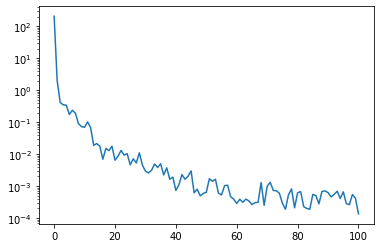

In [58]:

U = copy.deepcopy(Uinit)
VT = copy.deepcopy(VTinit)

for ep in range(100):
    np.random.shuffle(Omega)
    R = U@VT - A
    fval.append(np.mean([  R[j,i]**2 for j,i in Omega ]))
    
    for (j, i) in Omega:

        u = U[j,:]
        v = VT[:,i]
        uv = u.dot(v)
        a = A[j,i]

        r = a - uv
        p = [-r-uv, 0, 3*uv+2*r, -u.dot(u)-v.dot(v), -r]
        
        roots = quartic_roots(p)
        solidx =  np.argmin(np.abs(np.imag(roots)))
        lmbd = np.real(roots[0][solidx])

        rootssubsetion = roots[np.abs(np.imag(roots)) < 1e-8]
        solidx = np.argmin(np.abs(rootssubsetion))
        lmbd = np.real(rootssubsetion[solidx])
         
        du = lmbd/(1-lmbd**2) * (lmbd*u - v)
        dv = lmbd/(1-lmbd**2) * (lmbd*v - u)
        U[j,:] +=   du
        VT[:,i]+=   dv
        
R = U@VT - A
fval.append(np.mean([  R[j,i]**2 for j,i in Omega ]))
    
plt.semilogy(fval)


In [ ]:

U = copy.deepcopy(Uinit)
VT = copy.deepcopy(VTinit)

for ep in range(100):
    np.random.shuffle(Omega)
    R = U@VT - A
    fval.append(np.mean([  R[j,i]**2 for j,i in Omega ]))
    
    for (j, i) in Omega:

        u = U[j,:]
        v = VT[:,i]
        uv = u.dot(v)
        a = A[j,i]

        r = a - uv
        p = [-r-uv, 0, 3*uv+2*r, -u.dot(u)-v.dot(v), -r]
        
        roots = quartic_roots(p)
        solidx =  np.argmin(np.abs(np.imag(roots)))
        lmbd = np.real(roots[0][solidx])

        rootssubsetion = roots[np.abs(np.imag(roots)) < 1e-8]
        solidx = np.argmin(np.abs(rootssubsetion))
        lmbd = np.real(rootssubsetion[solidx])
         
        du = lmbd/(1-lmbd**2) * (lmbd*u - v)
        dv = lmbd/(1-lmbd**2) * (lmbd*v - u)
        U[j,:] +=   du
        VT[:,i]+=   dv
        
R = U@VT - A
fval.append(np.mean([  R[j,i]**2 for j,i in Omega ]))
    
plt.semilogy(fval)


Text(0, 0.5, 'MSE')

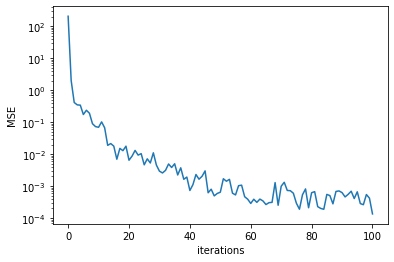

In [59]:
plt.semilogy(fval)
plt.xlabel("iterations")
plt.ylabel("MSE")


# ALS

In [13]:


# U =  np.random.randn(m,k) *0.01
# VT  =   np.random.randn(k,n)*0.01 

In [42]:
rs = [[] for j in range(m)]
cs = [[] for i in range(n)]

for j, i in OmegaOrig:
    rs[j].append(i)
    cs[i].append(j)
fvalLSA=[]
np.random.seed(1)
U = Us +np.random.randn(m,k)*0.9
VT  = VTs+ np.random.randn(k,n)*0.9


R = U@VT - A
fvalLSA.append(np.mean([  R[j,i]**2 for j,i in Omega ]))

for ep in range(100):
    R = U@VT - A
 
    for j in range(m):
#         np.random.shuffle(rs[j])
        if len(rs[j])>0:
            u = np.linalg.pinv(VT[:,rs[j] ].T) @ R[j,rs[j] ]
            U[j,:] -= u
        
    R = U@VT - A         
    for i in range(n):
        if len(cs[i])>0:
            v = np.linalg.pinv(U[ cs[i], : ]) @ R[ cs[i],i ]
            VT[:,i] -= v

            
    R = U@VT - A
    fvalLSA.append(np.mean([  R[j,i]**2 for j,i in Omega ]))
    

# ALS - online

In [87]:
rs = [[] for j in range(m)]
cs = [[] for i in range(n)]

eta = .9
for j, i in OmegaOrig:
    rs[j].append(i)
    cs[i].append(j)
fvalLSAOnline=[]
np.random.seed(1)
U = Us +np.random.randn(m,k)*0.9
VT  = VTs+ np.random.randn(k,n)*0.9


R = U@VT - A
fvalLSAOnline.append(np.mean([  R[j,i]**2 for j,i in Omega ]))

for ep in range(100):
    np.random.shuffle(Omega)
    for j,i in Omega:
        R = U@VT - A
        if np.random.rand(1)<0.5:
            c = i
            u = np.linalg.pinv(VT[:,c:c+1 ].T) @ R[j,c:c+1 ]
            U[j,:] -= eta*u
        else:
            r=j
            v = np.linalg.pinv(U[ r:r+1, : ]) @ R[ r:r+1,i ]
            VT[:,i] -= eta*v

            
    R = U@VT - A
    fvalLSAOnline.append(np.mean([  R[j,i]**2 for j,i in Omega ]))
    

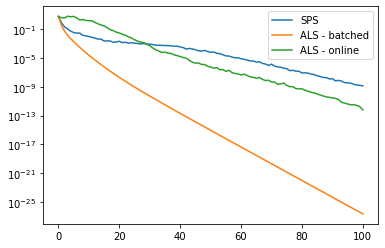

In [88]:
plt.semilogy(fval,label="SPS")
plt.semilogy(fvalLSA,label="ALS - batched")
plt.semilogy(fvalLSAOnline,label="ALS - online")
plt.legend()


In [331]:
VT[:,rs[j] ].T.shape, A[j,rs[j] ].shape

((13, 5), (13,))

In [336]:
roots

array([[-2.57221922+4.62866768j, -2.57221922-4.62866768j,
         0.03310517+0.j        ,  5.11133327-0.j        ]])

In [325]:
u <- u + du
v <- v + dv

array([[ 3.61873552, -4.2250083 ,  1.67603635, -2.09636641,  1.36163502,
        -2.90242325,  5.60008416, -2.30850662, -0.30143064,  0.94799001,
         4.42294381, -3.5149767 , -0.06820176],
       [-3.58084379,  8.00697116, -4.62531388,  0.13498541,  0.18810469,
        -2.68241849, -4.12322505,  0.99270166, -1.62849277,  8.82672435,
         3.92107686, -7.39747034, -5.33325479],
       [-6.76239121, -3.7411459 , -3.20358824,  5.10048264,  3.41405005,
         2.02339783,  0.42734207, -1.21243554, -3.79816118, -3.1684366 ,
        -3.62372062,  4.98154386,  2.21386265],
       [ 1.51397922, -0.41544923,  1.50738602,  0.81591474, -2.46015236,
         4.25495196, -1.46977011, -0.20734447,  2.91038442, -5.05223083,
         6.49780037, -4.29699537,  1.3514528 ],
       [ 3.85784854,  0.87017395,  5.22996924,  2.58863577,  4.35124382,
         4.19708706,  0.42594706,  6.69710929, -4.50458329, -1.68778718,
        -3.74709058,  0.21145962,  8.1548762 ]])

array([ 1.73002568,  2.93403814, -1.22158489, -0.47756704,  1.02500161,
       -1.56460858, -0.74759423,  0.94723392, -1.75898488,  3.20634946,
       -1.35936217,  0.60478711, -1.13212647])

In [206]:
solidx =  np.argmin(np.abs(np.imag(roots)))
print(solidx)
solidx  

2


0

In [290]:
rootssubsetion

array([-0.02078833+0.j,  3.7781964 -0.j])